# Module 4 - Algo Trading using Classification


   ### Welcome to the Answer notebook for Module 4 ! 
Make sure that you've submitted the module 3 notebook and unlocked Module 4 yourself before you start coding here


#--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------#

### Query 4.1 
Import the csv file of the stock which contained the Bollinger columns as well.



### Query 4.1a 

Create a new column 'Call' , whose entries are - 

>'Buy' if the stock price is below the lower Bollinger band 

>'Hold Buy/ Liquidate Short' if the stock price is between the lower and middle Bollinger band 

>'Hold Short/ Liquidate Buy' if the stock price is between the middle and upper Bollinger band 

>'Short' if the stock price is above the upper Bollinger band




In [372]:
import pandas as pd
import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
from plotly import tools
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings('ignore')

In [373]:
df = pd.read_csv('AJANTPHARM.csv')
df['Date'] = pd.to_datetime(df['Date'])
df.head()

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,AJANTPHARM,EQ,2017-05-15,1616.30,1610.00,1643.40,1601.00,1636.0,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42
1,AJANTPHARM,EQ,2017-05-16,1633.50,1632.50,1643.45,1610.00,1638.0,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09
2,AJANTPHARM,EQ,2017-05-17,1634.25,1620.50,1668.00,1620.50,1655.0,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42
3,AJANTPHARM,EQ,2017-05-18,1654.35,1640.25,1663.95,1621.85,1639.0,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06
4,AJANTPHARM,EQ,2017-05-19,1633.40,1640.00,1681.20,1621.50,1663.7,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33


In [374]:
df.info

<bound method DataFrame.info of          Symbol Series       Date  Prev Close  Open Price  High Price  \
0    AJANTPHARM     EQ 2017-05-15     1616.30     1610.00     1643.40   
1    AJANTPHARM     EQ 2017-05-16     1633.50     1632.50     1643.45   
2    AJANTPHARM     EQ 2017-05-17     1634.25     1620.50     1668.00   
3    AJANTPHARM     EQ 2017-05-18     1654.35     1640.25     1663.95   
4    AJANTPHARM     EQ 2017-05-19     1633.40     1640.00     1681.20   
5    AJANTPHARM     EQ 2017-05-22     1670.25     1670.00     1692.00   
6    AJANTPHARM     EQ 2017-05-23     1677.95     1687.80     1696.95   
7    AJANTPHARM     EQ 2017-05-24     1676.80     1672.00     1693.00   
8    AJANTPHARM     EQ 2017-05-25     1657.45     1650.00     1654.85   
9    AJANTPHARM     EQ 2017-05-26     1616.15     1615.00     1625.40   
10   AJANTPHARM     EQ 2017-05-29     1602.15     1597.00     1599.90   
11   AJANTPHARM     EQ 2017-05-30     1536.30     1520.20     1565.05   
12   AJANTPHARM    

In [375]:
df.index=df['Date']

In [376]:
df=df.drop('Date', axis=1)

In [377]:
df.head()

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
Date,,,,,,,,,,,,,,
2017-05-15,AJANTPHARM,EQ,1616.30,1610.00,1643.40,1601.00,1636.0,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42
2017-05-16,AJANTPHARM,EQ,1633.50,1632.50,1643.45,1610.00,1638.0,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09
2017-05-17,AJANTPHARM,EQ,1634.25,1620.50,1668.00,1620.50,1655.0,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42
2017-05-18,AJANTPHARM,EQ,1654.35,1640.25,1663.95,1621.85,1639.0,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06
2017-05-19,AJANTPHARM,EQ,1633.40,1640.00,1681.20,1621.50,1663.7,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33


In [378]:
df_sma = pd.DataFrame(df['Close Price'])
df_sma['close']=df_sma['Close Price']
df_sma=df_sma.drop('Close Price',axis=1)
sf=df_sma

In [379]:
df_sma=df_sma.rolling(window=10).mean()
df=df.rename({'Close Price':'close'},axis=1)


In [380]:
df_sma.head(12)

,close
Date,
2017-05-15,NaN
2017-05-16,NaN
2017-05-17,NaN
2017-05-18,NaN
2017-05-19,NaN
2017-05-22,NaN
2017-05-23,NaN
2017-05-24,NaN
2017-05-25,NaN


In [381]:
trace = go.Scatter(x=df.index,y=df.close,name='df close')
trace_mean = go.Scatter(x=df_sma.index,y=df_sma.close,name='df 10 days MA')
py.iplot([trace,trace_mean])

In [382]:
up_std = df_sma[['close']] + 2*df_sma[['close']].rolling(window=10).std()
lo_std = df_sma[['close']] - 2*df_sma[['close']].rolling(window=10).std()
drw_std_up = go.Scatter(x=up_std.index,y=up_std.close,name='10 MA upper band ADM')
drw_std_lo = go.Scatter(x=lo_std.index,y=lo_std.close,name='10 MA lower band ADM')


py.iplot([trace,trace_mean,drw_std_up,drw_std_lo])


In [383]:
call=[]
up_std=up_std.fillna(0)
lo_std=lo_std.fillna(0)
df_sma=df_sma.fillna(0)
for i in range (0,len(df.index)):
    if(sf.iloc[i,0]<lo_std.iloc[i,0]):
        call.append('Buy')
    elif(lo_std.iloc[i,0]<sf.iloc[i,0]<df_sma.iloc[i,0]):
        call.append('Hold Buy/ Liquidate Short')
    elif(df_sma.iloc[i,0]<sf.iloc[i,0]<up_std.iloc[i,0]):
        call.append('Hold Short/ Liquidate Buy')
    elif(sf.iloc[i,0]>up_std.iloc[i,0]):
        call.append('Short' )
        

In [384]:
df['call']=call

In [385]:
df

,Symbol,Series,Prev Close,Open Price,High Price,Low Price,Last Price,close,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,call
Date,,,,,,,,,,,,,,,
2017-05-15,AJANTPHARM,EQ,1616.30,1610.00,1643.40,1601.00,1636.00,1633.50,1626.20,80998,1.317191e+08,8331,24643,30.42,Short
2017-05-16,AJANTPHARM,EQ,1633.50,1632.50,1643.45,1610.00,1638.00,1634.25,1626.38,49236,8.007667e+07,4863,13831,28.09,Short
2017-05-17,AJANTPHARM,EQ,1634.25,1620.50,1668.00,1620.50,1655.00,1654.35,1651.81,210648,3.479504e+08,12022,131496,62.42,Short
2017-05-18,AJANTPHARM,EQ,1654.35,1640.25,1663.95,1621.85,1639.00,1633.40,1633.59,81511,1.331553e+08,5489,37544,46.06,Short
2017-05-19,AJANTPHARM,EQ,1633.40,1640.00,1681.20,1621.50,1663.70,1670.25,1655.61,189657,3.139979e+08,8043,89768,47.33,Short
2017-05-22,AJANTPHARM,EQ,1670.25,1670.00,1692.00,1648.00,1684.00,1677.95,1675.96,157923,2.646724e+08,7367,71708,45.41,Short
2017-05-23,AJANTPHARM,EQ,1677.95,1687.80,1696.95,1619.00,1667.20,1676.80,1661.35,209386,3.478640e+08,9880,83637,39.94,Short
2017-05-24,AJANTPHARM,EQ,1676.80,1672.00,1693.00,1623.30,1638.50,1657.45,1658.59,171228,2.839967e+08,8998,74108,43.28,Short
2017-05-25,AJANTPHARM,EQ,1657.45,1650.00,1654.85,1578.05,1608.55,1616.15,1607.21,284830,4.577828e+08,18627,59249,20.80,Short


In [386]:
df_sma['stock']=df['close']
df_sma['upper']=up_std['close']
df_sma['lower']=lo_std['close']
df_sma['call']=df['call']

In [387]:
df_sma.rename(columns={'close':'middle'},inplace=True)

In [388]:
df['call'].unique()

array(['Short', 'Hold Buy/ Liquidate Short', 'Hold Short/ Liquidate Buy',
       'Buy'], dtype=object)

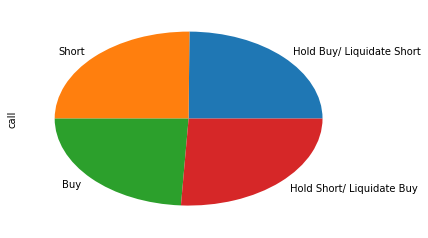

In [389]:
import matplotlib.pyplot as plt
df.call.value_counts(sort=False).plot.pie()
plt.show()

Now train a classification model with the 3 bollinger columns and the stock price as inputs and 'Calls' as output. Check the accuracy on a test set. (There are many classifier models to choose from, try each one out and compare the accuracy for each) Import another stock data and create the bollinger columns. Using the already defined model, predict the daily calls for this new stock.

In [390]:
X=df_sma[['middle','upper','lower']]
y=df['call']

In [391]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [392]:
from sklearn.neighbors import KNeighborsClassifier

model1 = KNeighborsClassifier(n_neighbors=4)

# Train the model using the training sets
model1.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=4, p=2,
           weights='uniform')

In [393]:
y_predk=model1.predict(X)
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y, y_predk))  
print(classification_report(y, y_predk))  

[[82 13 11 13]
 [19 90 11  3]
 [16 20 85  7]
 [22  9 24 69]]
                           precision    recall  f1-score   support

                      Buy       0.59      0.69      0.64       119
Hold Buy/ Liquidate Short       0.68      0.73      0.71       123
Hold Short/ Liquidate Buy       0.65      0.66      0.66       128
                    Short       0.75      0.56      0.64       124

              avg / total       0.67      0.66      0.66       494



In [394]:
from sklearn import metrics
metrics.accuracy_score(y,y_predk)

0.659919028340081

In [395]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):  
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X, y)
    pred_i = knn.predict(X)
    error.append(np.mean(pred_i != y))

Text(0,0.5,'Mean Error')

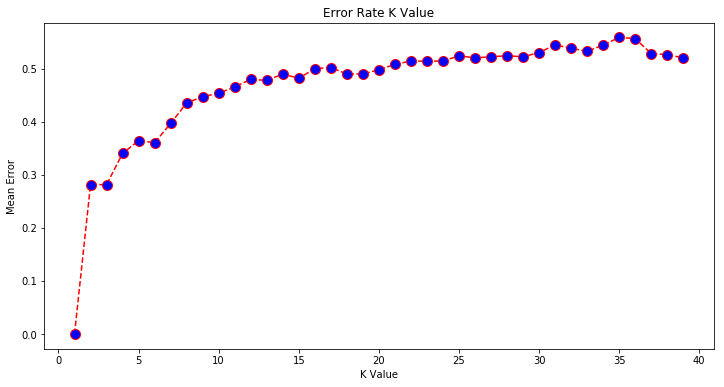

In [396]:
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')  
plt.xlabel('K Value')  
plt.ylabel('Mean Error')  

In [397]:
from sklearn.svm import SVC
clf = SVC(gamma='auto')
clf.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [398]:
y_pred=clf.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5  3 34  2]
 [ 3  2 52  0]
 [ 1  2 40  1]
 [ 2  2 37 12]]
                           precision    recall  f1-score   support

                      Buy       0.45      0.11      0.18        44
Hold Buy/ Liquidate Short       0.22      0.04      0.06        57
Hold Short/ Liquidate Buy       0.25      0.91      0.39        44
                    Short       0.80      0.23      0.35        53

              avg / total       0.43      0.30      0.24       198



In [399]:
from sklearn import svm
Sc=svm.SVC(kernel='linear')
Sc.fit(X_train,y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [400]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[ 5  3 34  2]
 [ 3  2 52  0]
 [ 1  2 40  1]
 [ 2  2 37 12]]
                           precision    recall  f1-score   support

                      Buy       0.45      0.11      0.18        44
Hold Buy/ Liquidate Short       0.22      0.04      0.06        57
Hold Short/ Liquidate Buy       0.25      0.91      0.39        44
                    Short       0.80      0.23      0.35        53

              avg / total       0.43      0.30      0.24       198



In [401]:
from sklearn.ensemble import RandomForestClassifier
model4 = RandomForestClassifier()
model4.fit(X_train,y_train)
y_pred= model4.predict(X_test)

In [402]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[17  9 13  5]
 [10 23 20  4]
 [ 7 10 24  3]
 [11 14 11 17]]
                           precision    recall  f1-score   support

                      Buy       0.38      0.39      0.38        44
Hold Buy/ Liquidate Short       0.41      0.40      0.41        57
Hold Short/ Liquidate Buy       0.35      0.55      0.43        44
                    Short       0.59      0.32      0.41        53

              avg / total       0.44      0.41      0.41       198



In [403]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.4090909090909091

In [404]:
from sklearn.tree import DecisionTreeClassifier 
tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=1)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1,
            splitter='best')

In [405]:
y_pred=tree.predict(X_test)
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))


                           precision    recall  f1-score   support

                      Buy       0.32      0.59      0.42        44
Hold Buy/ Liquidate Short       0.78      0.12      0.21        57
Hold Short/ Liquidate Buy       0.29      0.50      0.37        44
                    Short       0.39      0.25      0.30        53

              avg / total       0.47      0.34      0.32       198

[[26  0 13  5]
 [15  7 26  9]
 [14  2 22  6]
 [26  0 14 13]]


In [406]:
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)

0.3434343434343434

In [407]:
test=pd.read_csv('LALPATHLAB.csv')
test=test.dropna().reset_index(drop=True)
sf=test['Close Price']
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,LALPATHLAB,EQ,15-May-2017,891.15,895.00,914.15,881.00,912.00,900.60,889.35,257655,2.291453e+08,15451,174775,67.83
1,LALPATHLAB,EQ,16-May-2017,900.60,910.00,925.00,895.05,909.40,910.95,914.57,104896,9.593430e+07,13001,75813,72.27
2,LALPATHLAB,EQ,17-May-2017,910.95,913.00,925.00,909.00,912.05,911.70,917.19,72460,6.645960e+07,2802,53829,74.29
3,LALPATHLAB,EQ,18-May-2017,911.70,908.00,919.35,903.05,906.00,909.75,914.12,37707,3.446889e+07,2731,24836,65.87
4,LALPATHLAB,EQ,19-May-2017,909.75,917.00,917.00,905.80,910.00,910.25,910.61,81082,7.383375e+07,4430,69926,86.24
5,LALPATHLAB,EQ,22-May-2017,910.25,909.00,914.00,905.00,907.40,909.85,909.89,150085,1.365613e+08,3350,136057,90.65
6,LALPATHLAB,EQ,23-May-2017,909.85,913.95,913.95,875.00,890.00,886.90,899.58,201776,1.815139e+08,7913,167269,82.90
7,LALPATHLAB,EQ,24-May-2017,886.90,886.90,903.05,883.80,893.00,894.70,895.74,84241,7.545772e+07,4014,67593,80.24
8,LALPATHLAB,EQ,25-May-2017,894.70,897.90,901.00,894.25,898.20,898.25,899.80,241232,2.170599e+08,4535,219442,90.97
9,LALPATHLAB,EQ,26-May-2017,898.25,903.45,907.90,880.00,888.00,893.70,898.82,75168,6.756225e+07,7428,57741,76.82


In [408]:
middle_band = test['Close Price'].rolling(window=14).mean()
std = test['Close Price'].rolling(window=14).std()
upper_band = middle_band + 2* std
lower_band = middle_band - 2* std
test['upper_bb']=upper_band.dropna()
test['lower_bb']=lower_band.dropna()
test['middle_bb']=middle_band.dropna()

In [409]:
test=test.dropna().reset_index(drop=True)
test['call']=0

In [410]:
X=test[['middle_bb','upper_bb','lower_bb']]
test['call']=model1.predict(X)

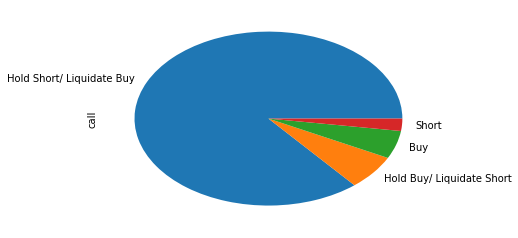

In [411]:
test['call'].value_counts().plot(kind='pie')

In [412]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call
0,LALPATHLAB,EQ,01-Jun-2017,904.15,916.00,919.80,897.10,898.25,900.60,904.02,108277,9.788415e+07,4930,71398,65.94,917.423230,887.269627,902.346429,Hold Short/ Liquidate Buy
1,LALPATHLAB,EQ,02-Jun-2017,900.60,907.90,912.00,886.95,907.00,903.75,898.44,103386,9.288580e+07,11005,61235,59.23,917.629966,887.512891,902.571429,Hold Short/ Liquidate Buy
2,LALPATHLAB,EQ,05-Jun-2017,903.75,910.40,911.55,897.00,906.55,904.50,905.14,95555,8.649044e+07,5444,77489,81.09,916.442131,887.779298,902.110714,Hold Short/ Liquidate Buy
3,LALPATHLAB,EQ,06-Jun-2017,904.50,917.00,917.00,899.80,905.50,904.65,904.38,37640,3.404084e+07,4214,26259,69.76,914.948337,888.265948,901.607143,Hold Short/ Liquidate Buy
4,LALPATHLAB,EQ,07-Jun-2017,904.65,901.95,916.80,898.45,915.00,914.90,912.86,38911,3.552041e+07,2980,26762,68.78,916.513636,887.436364,901.975000,Hold Short/ Liquidate Buy
5,LALPATHLAB,EQ,08-Jun-2017,914.90,915.00,915.90,901.00,901.00,906.50,908.32,80868,7.345430e+07,4803,67631,83.63,915.717626,887.696660,901.707143,Hold Short/ Liquidate Buy
6,LALPATHLAB,EQ,09-Jun-2017,906.50,910.00,913.55,891.00,898.55,898.95,898.91,77867,6.999542e+07,3301,55713,71.55,914.180724,887.676418,900.928571,Hold Short/ Liquidate Buy
7,LALPATHLAB,EQ,12-Jun-2017,898.95,900.00,904.70,890.00,893.10,895.25,896.91,37067,3.324586e+07,4250,21632,58.36,912.636031,890.413969,901.525000,Hold Short/ Liquidate Buy
8,LALPATHLAB,EQ,13-Jun-2017,895.25,902.95,912.25,895.10,905.20,907.15,909.20,40144,3.649878e+07,5721,26407,65.78,913.159118,891.669453,902.414286,Hold Short/ Liquidate Buy
9,LALPATHLAB,EQ,14-Jun-2017,907.15,908.00,912.40,897.00,902.50,899.35,902.42,39139,3.531982e+07,1713,29615,75.67,913.121979,891.863735,902.492857,Hold Short/ Liquidate Buy


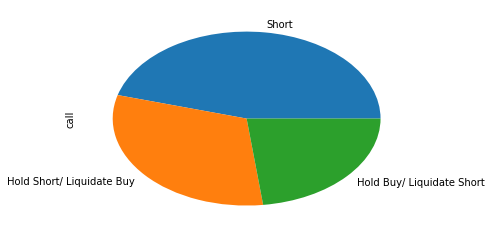

In [413]:
test['call']=Sc.predict(X)##SVM
test['call'].value_counts().plot(kind='pie')

In [414]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call
0,LALPATHLAB,EQ,01-Jun-2017,904.15,916.00,919.80,897.10,898.25,900.60,904.02,108277,9.788415e+07,4930,71398,65.94,917.423230,887.269627,902.346429,Short
1,LALPATHLAB,EQ,02-Jun-2017,900.60,907.90,912.00,886.95,907.00,903.75,898.44,103386,9.288580e+07,11005,61235,59.23,917.629966,887.512891,902.571429,Short
2,LALPATHLAB,EQ,05-Jun-2017,903.75,910.40,911.55,897.00,906.55,904.50,905.14,95555,8.649044e+07,5444,77489,81.09,916.442131,887.779298,902.110714,Short
3,LALPATHLAB,EQ,06-Jun-2017,904.50,917.00,917.00,899.80,905.50,904.65,904.38,37640,3.404084e+07,4214,26259,69.76,914.948337,888.265948,901.607143,Short
4,LALPATHLAB,EQ,07-Jun-2017,904.65,901.95,916.80,898.45,915.00,914.90,912.86,38911,3.552041e+07,2980,26762,68.78,916.513636,887.436364,901.975000,Short
5,LALPATHLAB,EQ,08-Jun-2017,914.90,915.00,915.90,901.00,901.00,906.50,908.32,80868,7.345430e+07,4803,67631,83.63,915.717626,887.696660,901.707143,Short
6,LALPATHLAB,EQ,09-Jun-2017,906.50,910.00,913.55,891.00,898.55,898.95,898.91,77867,6.999542e+07,3301,55713,71.55,914.180724,887.676418,900.928571,Short
7,LALPATHLAB,EQ,12-Jun-2017,898.95,900.00,904.70,890.00,893.10,895.25,896.91,37067,3.324586e+07,4250,21632,58.36,912.636031,890.413969,901.525000,Short
8,LALPATHLAB,EQ,13-Jun-2017,895.25,902.95,912.25,895.10,905.20,907.15,909.20,40144,3.649878e+07,5721,26407,65.78,913.159118,891.669453,902.414286,Short
9,LALPATHLAB,EQ,14-Jun-2017,907.15,908.00,912.40,897.00,902.50,899.35,902.42,39139,3.531982e+07,1713,29615,75.67,913.121979,891.863735,902.492857,Short


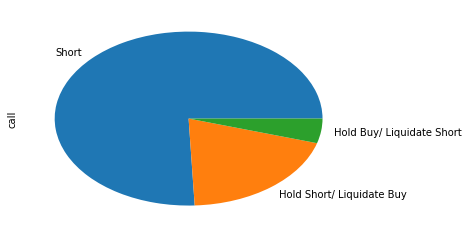

In [415]:
test['call']=tree.predict(X)
test['call'].value_counts().plot(kind='pie')

In [416]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call
0,LALPATHLAB,EQ,01-Jun-2017,904.15,916.00,919.80,897.10,898.25,900.60,904.02,108277,9.788415e+07,4930,71398,65.94,917.423230,887.269627,902.346429,Short
1,LALPATHLAB,EQ,02-Jun-2017,900.60,907.90,912.00,886.95,907.00,903.75,898.44,103386,9.288580e+07,11005,61235,59.23,917.629966,887.512891,902.571429,Short
2,LALPATHLAB,EQ,05-Jun-2017,903.75,910.40,911.55,897.00,906.55,904.50,905.14,95555,8.649044e+07,5444,77489,81.09,916.442131,887.779298,902.110714,Short
3,LALPATHLAB,EQ,06-Jun-2017,904.50,917.00,917.00,899.80,905.50,904.65,904.38,37640,3.404084e+07,4214,26259,69.76,914.948337,888.265948,901.607143,Short
4,LALPATHLAB,EQ,07-Jun-2017,904.65,901.95,916.80,898.45,915.00,914.90,912.86,38911,3.552041e+07,2980,26762,68.78,916.513636,887.436364,901.975000,Short
5,LALPATHLAB,EQ,08-Jun-2017,914.90,915.00,915.90,901.00,901.00,906.50,908.32,80868,7.345430e+07,4803,67631,83.63,915.717626,887.696660,901.707143,Short
6,LALPATHLAB,EQ,09-Jun-2017,906.50,910.00,913.55,891.00,898.55,898.95,898.91,77867,6.999542e+07,3301,55713,71.55,914.180724,887.676418,900.928571,Short
7,LALPATHLAB,EQ,12-Jun-2017,898.95,900.00,904.70,890.00,893.10,895.25,896.91,37067,3.324586e+07,4250,21632,58.36,912.636031,890.413969,901.525000,Short
8,LALPATHLAB,EQ,13-Jun-2017,895.25,902.95,912.25,895.10,905.20,907.15,909.20,40144,3.649878e+07,5721,26407,65.78,913.159118,891.669453,902.414286,Short
9,LALPATHLAB,EQ,14-Jun-2017,907.15,908.00,912.40,897.00,902.50,899.35,902.42,39139,3.531982e+07,1713,29615,75.67,913.121979,891.863735,902.492857,Short


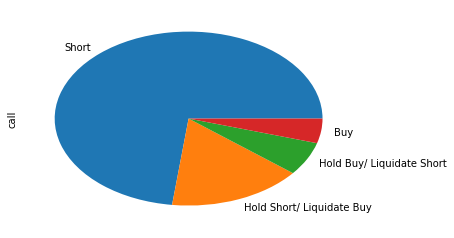

In [417]:
test['call']=model4.predict(X)
test['call'].value_counts().plot(kind='pie')


In [418]:
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call
0,LALPATHLAB,EQ,01-Jun-2017,904.15,916.00,919.80,897.10,898.25,900.60,904.02,108277,9.788415e+07,4930,71398,65.94,917.423230,887.269627,902.346429,Short
1,LALPATHLAB,EQ,02-Jun-2017,900.60,907.90,912.00,886.95,907.00,903.75,898.44,103386,9.288580e+07,11005,61235,59.23,917.629966,887.512891,902.571429,Short
2,LALPATHLAB,EQ,05-Jun-2017,903.75,910.40,911.55,897.00,906.55,904.50,905.14,95555,8.649044e+07,5444,77489,81.09,916.442131,887.779298,902.110714,Short
3,LALPATHLAB,EQ,06-Jun-2017,904.50,917.00,917.00,899.80,905.50,904.65,904.38,37640,3.404084e+07,4214,26259,69.76,914.948337,888.265948,901.607143,Short
4,LALPATHLAB,EQ,07-Jun-2017,904.65,901.95,916.80,898.45,915.00,914.90,912.86,38911,3.552041e+07,2980,26762,68.78,916.513636,887.436364,901.975000,Short
5,LALPATHLAB,EQ,08-Jun-2017,914.90,915.00,915.90,901.00,901.00,906.50,908.32,80868,7.345430e+07,4803,67631,83.63,915.717626,887.696660,901.707143,Short
6,LALPATHLAB,EQ,09-Jun-2017,906.50,910.00,913.55,891.00,898.55,898.95,898.91,77867,6.999542e+07,3301,55713,71.55,914.180724,887.676418,900.928571,Short
7,LALPATHLAB,EQ,12-Jun-2017,898.95,900.00,904.70,890.00,893.10,895.25,896.91,37067,3.324586e+07,4250,21632,58.36,912.636031,890.413969,901.525000,Short
8,LALPATHLAB,EQ,13-Jun-2017,895.25,902.95,912.25,895.10,905.20,907.15,909.20,40144,3.649878e+07,5721,26407,65.78,913.159118,891.669453,902.414286,Short
9,LALPATHLAB,EQ,14-Jun-2017,907.15,908.00,912.40,897.00,902.50,899.35,902.42,39139,3.531982e+07,1713,29615,75.67,913.121979,891.863735,902.492857,Short


we will get all calls in Randomforest classifier

In [419]:
call=[]
up_std=upper_band.fillna(0)
lo_std=lower_band.fillna(0)
df_sma=middle_band.fillna(0)
for i in range (0,len(test.index)):
    if(sf[i]<lo_std[i]):
        call.append('Buy')
    elif(lo_std[i]<sf[i]<df_sma[i]):
        call.append('Hold Buy/ Liquidate Short')
    elif(df_sma[i]<sf[i]<up_std[i]):
        call.append('Hold Short/ Liquidate Buy')
    elif(sf[i]>up_std[i]):
        call.append('Short' )
        

In [420]:
test['actual call']=call
test

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,upper_bb,lower_bb,middle_bb,call,actual call
0,LALPATHLAB,EQ,01-Jun-2017,904.15,916.00,919.80,897.10,898.25,900.60,904.02,108277,9.788415e+07,4930,71398,65.94,917.423230,887.269627,902.346429,Short,Short
1,LALPATHLAB,EQ,02-Jun-2017,900.60,907.90,912.00,886.95,907.00,903.75,898.44,103386,9.288580e+07,11005,61235,59.23,917.629966,887.512891,902.571429,Short,Short
2,LALPATHLAB,EQ,05-Jun-2017,903.75,910.40,911.55,897.00,906.55,904.50,905.14,95555,8.649044e+07,5444,77489,81.09,916.442131,887.779298,902.110714,Short,Short
3,LALPATHLAB,EQ,06-Jun-2017,904.50,917.00,917.00,899.80,905.50,904.65,904.38,37640,3.404084e+07,4214,26259,69.76,914.948337,888.265948,901.607143,Short,Short
4,LALPATHLAB,EQ,07-Jun-2017,904.65,901.95,916.80,898.45,915.00,914.90,912.86,38911,3.552041e+07,2980,26762,68.78,916.513636,887.436364,901.975000,Short,Short
5,LALPATHLAB,EQ,08-Jun-2017,914.90,915.00,915.90,901.00,901.00,906.50,908.32,80868,7.345430e+07,4803,67631,83.63,915.717626,887.696660,901.707143,Short,Short
6,LALPATHLAB,EQ,09-Jun-2017,906.50,910.00,913.55,891.00,898.55,898.95,898.91,77867,6.999542e+07,3301,55713,71.55,914.180724,887.676418,900.928571,Short,Short
7,LALPATHLAB,EQ,12-Jun-2017,898.95,900.00,904.70,890.00,893.10,895.25,896.91,37067,3.324586e+07,4250,21632,58.36,912.636031,890.413969,901.525000,Short,Short
8,LALPATHLAB,EQ,13-Jun-2017,895.25,902.95,912.25,895.10,905.20,907.15,909.20,40144,3.649878e+07,5721,26407,65.78,913.159118,891.669453,902.414286,Short,Short
9,LALPATHLAB,EQ,14-Jun-2017,907.15,908.00,912.40,897.00,902.50,899.35,902.42,39139,3.531982e+07,1713,29615,75.67,913.121979,891.863735,902.492857,Short,Short


In [421]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(test['actual call'], test['call']))  
print(classification_report(test['actual call'], test['call']))  

[[  0   0   3  21]
 [ 13  13  27 173]
 [  6  16  42 131]
 [  3   1   6  27]]
                           precision    recall  f1-score   support

                      Buy       0.00      0.00      0.00        24
Hold Buy/ Liquidate Short       0.43      0.06      0.10       226
Hold Short/ Liquidate Buy       0.54      0.22      0.31       195
                    Short       0.08      0.73      0.14        37

              avg / total       0.43      0.17      0.18       482



this is we got using random forest

##Query 4.2

Import the stock data file of your choice

Define 4 new columns , whose values are:
% change between Open and Close price for the day
% change between Low and High price for the day
5 day rolling mean of the day to day % change in Close Price
5 day rolling std of the day to day % change in Close Price

Create a new column 'Action' whose values are:
1 if next day's price(Close) is greater than present day's.
(-1) if next day's price(Close) is less than present day's.
i.e. Action [ i ] = 1 if Close[ i+1 ] > Close[ i ]
i.e. Action [ i ] = (-1) if Close[ i+1 ] < Close[ i ]

Construct a classification model with the 4 new inputs and 'Action' as target

 Check the accuracy of this model , also , plot the net cumulative returns (in %) if we were to follow this algorithmic model


In [422]:
new=pd.read_csv('TATACHEM.csv')

In [423]:
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty
0,TATACHEM,EQ,15-May-2017,628.40,628.90,636.80,627.10,629.60,629.80,632.46,348768,2.205834e+08,16519,137793,39.51
1,TATACHEM,EQ,16-May-2017,629.80,629.90,647.00,629.90,645.00,643.90,640.36,426939,2.733932e+08,8398,221740,51.94
2,TATACHEM,EQ,17-May-2017,643.90,645.00,647.00,636.05,636.10,638.10,640.51,304687,1.951552e+08,8663,79983,26.25
3,TATACHEM,EQ,18-May-2017,638.10,635.00,635.00,622.20,630.00,624.90,626.25,470858,2.948729e+08,10717,224935,47.77
4,TATACHEM,EQ,19-May-2017,624.90,628.00,635.60,610.00,618.00,616.45,623.41,285139,1.777580e+08,7906,67972,23.84
5,TATACHEM,EQ,22-May-2017,616.45,612.10,624.40,596.40,599.00,598.90,610.18,401429,2.449445e+08,13679,89764,22.36
6,TATACHEM,EQ,23-May-2017,598.90,595.10,609.45,580.95,603.30,601.90,599.46,739125,4.430772e+08,20995,354761,48.00
7,TATACHEM,EQ,24-May-2017,601.90,604.00,609.90,591.55,595.00,596.05,600.37,374373,2.247639e+08,19123,142474,38.06
8,TATACHEM,EQ,25-May-2017,596.05,596.55,619.00,596.55,613.00,615.25,609.58,472017,2.877328e+08,15844,127670,27.05
9,TATACHEM,EQ,26-May-2017,615.25,617.30,625.95,606.00,609.45,610.40,614.91,1217053,7.483793e+08,27245,171107,14.06


In [424]:
new['oc_pct']=((new['Open Price']-new['Close Price'])/new['Open Price'])*100
new['lp_pct']=((new['Low Price']-new['High Price'])/new['Low Price'])*100
new['day5_rollmean']=(new['Close Price'].pct_change()*100).rolling(5).mean()
new['day5_rollstd']=(new['Close Price'].pct_change()*100).rolling(5).std()
new=new.dropna().reset_index(drop=True)
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc_pct,lp_pct,day5_rollmean,day5_rollstd
0,TATACHEM,EQ,22-May-2017,616.45,612.10,624.40,596.40,599.00,598.90,610.18,401429,2.449445e+08,13679,89764,22.36,2.156510,-4.694836,-0.985952,1.947818
1,TATACHEM,EQ,23-May-2017,598.90,595.10,609.45,580.95,603.30,601.90,599.46,739125,4.430772e+08,20995,354761,48.00,-1.142665,-4.905758,-1.333529,1.263295
2,TATACHEM,EQ,24-May-2017,601.90,604.00,609.90,591.55,595.00,596.05,600.37,374373,2.247639e+08,19123,142474,38.06,1.316225,-3.102020,-1.347762,1.257588
3,TATACHEM,EQ,25-May-2017,596.05,596.55,619.00,596.55,613.00,615.25,609.58,472017,2.877328e+08,15844,127670,27.05,-3.134691,-3.763306,-0.289792,2.295943
4,TATACHEM,EQ,26-May-2017,615.25,617.30,625.95,606.00,609.45,610.40,614.91,1217053,7.483793e+08,27245,171107,14.06,1.117771,-3.292079,-0.177008,2.243968
5,TATACHEM,EQ,29-May-2017,610.40,612.00,617.90,605.00,609.20,608.25,610.05,532092,3.246040e+08,17088,199576,37.51,0.612745,-2.132231,0.321935,1.717483
6,TATACHEM,EQ,30-May-2017,608.25,609.00,629.50,601.75,627.95,627.15,618.90,467679,2.894477e+08,13601,166441,35.59,-2.980296,-4.611550,0.843207,2.131106
7,TATACHEM,EQ,31-May-2017,627.15,630.00,632.95,622.45,625.95,628.30,628.98,333451,2.097352e+08,11613,86969,26.08,0.269841,-1.686882,1.074265,1.939085
8,TATACHEM,EQ,01-Jun-2017,628.30,632.00,641.00,630.00,639.00,637.45,637.51,545589,3.478158e+08,21787,129717,23.78,-0.862342,-1.746032,0.721286,1.577485
9,TATACHEM,EQ,02-Jun-2017,637.45,638.50,645.90,636.85,637.00,639.70,641.17,622003,3.988107e+08,12269,386904,62.20,-0.187940,-1.421057,0.949539,1.373877


In [425]:
new['Action']=None
for row in range(len(new)-1):
    if((new['Close Price'].iloc[row+1])>(new['Close Price'].iloc[row])):
        new['Action'].iloc[row]=1
    else:
        new['Action'].iloc[row]=-1

In [426]:
new.head(10)

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc_pct,lp_pct,day5_rollmean,day5_rollstd,Action
0,TATACHEM,EQ,22-May-2017,616.45,612.10,624.40,596.40,599.00,598.90,610.18,401429,2.449445e+08,13679,89764,22.36,2.156510,-4.694836,-0.985952,1.947818,1
1,TATACHEM,EQ,23-May-2017,598.90,595.10,609.45,580.95,603.30,601.90,599.46,739125,4.430772e+08,20995,354761,48.00,-1.142665,-4.905758,-1.333529,1.263295,-1
2,TATACHEM,EQ,24-May-2017,601.90,604.00,609.90,591.55,595.00,596.05,600.37,374373,2.247639e+08,19123,142474,38.06,1.316225,-3.102020,-1.347762,1.257588,1
3,TATACHEM,EQ,25-May-2017,596.05,596.55,619.00,596.55,613.00,615.25,609.58,472017,2.877328e+08,15844,127670,27.05,-3.134691,-3.763306,-0.289792,2.295943,-1
4,TATACHEM,EQ,26-May-2017,615.25,617.30,625.95,606.00,609.45,610.40,614.91,1217053,7.483793e+08,27245,171107,14.06,1.117771,-3.292079,-0.177008,2.243968,-1
5,TATACHEM,EQ,29-May-2017,610.40,612.00,617.90,605.00,609.20,608.25,610.05,532092,3.246040e+08,17088,199576,37.51,0.612745,-2.132231,0.321935,1.717483,1
6,TATACHEM,EQ,30-May-2017,608.25,609.00,629.50,601.75,627.95,627.15,618.90,467679,2.894477e+08,13601,166441,35.59,-2.980296,-4.611550,0.843207,2.131106,1
7,TATACHEM,EQ,31-May-2017,627.15,630.00,632.95,622.45,625.95,628.30,628.98,333451,2.097352e+08,11613,86969,26.08,0.269841,-1.686882,1.074265,1.939085,1
8,TATACHEM,EQ,01-Jun-2017,628.30,632.00,641.00,630.00,639.00,637.45,637.51,545589,3.478158e+08,21787,129717,23.78,-0.862342,-1.746032,0.721286,1.577485,1
9,TATACHEM,EQ,02-Jun-2017,637.45,638.50,645.90,636.85,637.00,639.70,641.17,622003,3.988107e+08,12269,386904,62.20,-0.187940,-1.421057,0.949539,1.373877,-1


In [427]:
new=new.dropna().reset_index(drop=True)
new

,Symbol,Series,Date,Prev Close,Open Price,High Price,Low Price,Last Price,Close Price,Average Price,Total Traded Quantity,Turnover,No. of Trades,Deliverable Qty,% Dly Qt to Traded Qty,oc_pct,lp_pct,day5_rollmean,day5_rollstd,Action
0,TATACHEM,EQ,22-May-2017,616.45,612.10,624.40,596.40,599.00,598.90,610.18,401429,2.449445e+08,13679,89764,22.36,2.156510,-4.694836,-0.985952,1.947818,1
1,TATACHEM,EQ,23-May-2017,598.90,595.10,609.45,580.95,603.30,601.90,599.46,739125,4.430772e+08,20995,354761,48.00,-1.142665,-4.905758,-1.333529,1.263295,-1
2,TATACHEM,EQ,24-May-2017,601.90,604.00,609.90,591.55,595.00,596.05,600.37,374373,2.247639e+08,19123,142474,38.06,1.316225,-3.102020,-1.347762,1.257588,1
3,TATACHEM,EQ,25-May-2017,596.05,596.55,619.00,596.55,613.00,615.25,609.58,472017,2.877328e+08,15844,127670,27.05,-3.134691,-3.763306,-0.289792,2.295943,-1
4,TATACHEM,EQ,26-May-2017,615.25,617.30,625.95,606.00,609.45,610.40,614.91,1217053,7.483793e+08,27245,171107,14.06,1.117771,-3.292079,-0.177008,2.243968,-1
5,TATACHEM,EQ,29-May-2017,610.40,612.00,617.90,605.00,609.20,608.25,610.05,532092,3.246040e+08,17088,199576,37.51,0.612745,-2.132231,0.321935,1.717483,1
6,TATACHEM,EQ,30-May-2017,608.25,609.00,629.50,601.75,627.95,627.15,618.90,467679,2.894477e+08,13601,166441,35.59,-2.980296,-4.611550,0.843207,2.131106,1
7,TATACHEM,EQ,31-May-2017,627.15,630.00,632.95,622.45,625.95,628.30,628.98,333451,2.097352e+08,11613,86969,26.08,0.269841,-1.686882,1.074265,1.939085,1
8,TATACHEM,EQ,01-Jun-2017,628.30,632.00,641.00,630.00,639.00,637.45,637.51,545589,3.478158e+08,21787,129717,23.78,-0.862342,-1.746032,0.721286,1.577485,1
9,TATACHEM,EQ,02-Jun-2017,637.45,638.50,645.90,636.85,637.00,639.70,641.17,622003,3.988107e+08,12269,386904,62.20,-0.187940,-1.421057,0.949539,1.373877,-1


In [428]:
X=new[['oc_pct','lp_pct','day5_rollmean','day5_rollstd']]
y=new['Action']
y=y.astype('int')

In [429]:

from sklearn.ensemble import RandomForestClassifier

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X,y)

y_pred=clf.predict(X)

In [430]:
metrics.accuracy_score(y,y_pred)

1.0

In [431]:
new['Market Return']=((new['Close Price']/new['Close Price'].shift(1)))

In [432]:
new['Strategy Return']=new['Market Return']*y_pred

Text(0,0.5,'Strategy Return')

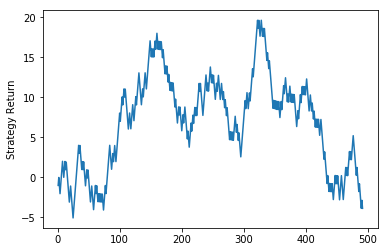

In [433]:
ax=new['Strategy Return'].cumsum().plot()
ax.set_ylabel('Strategy Return')